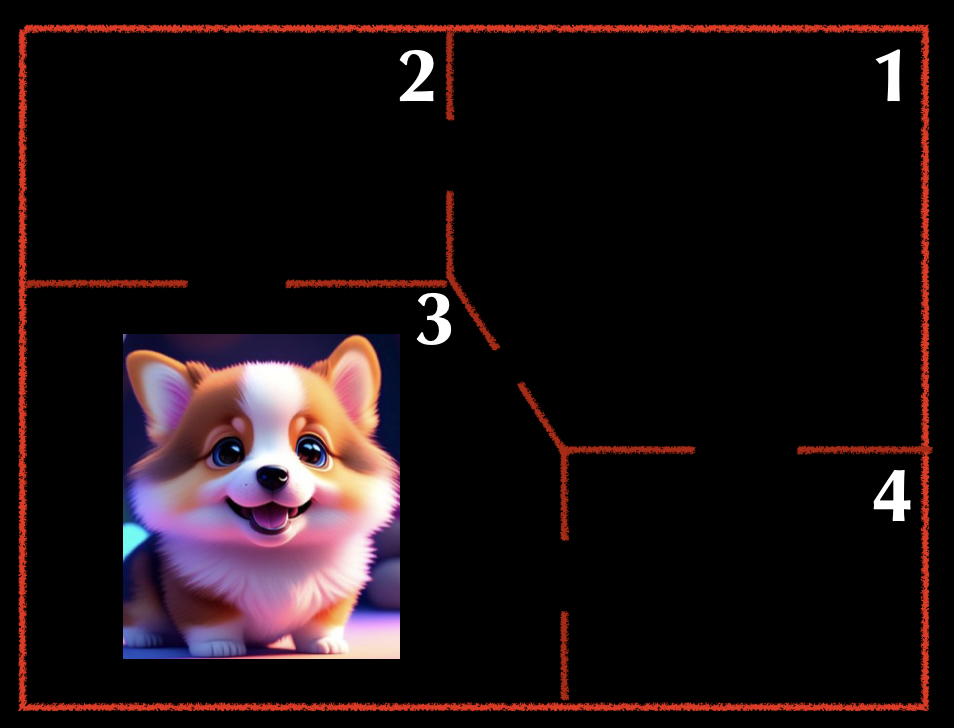

In [1]:
# @hidden_cell
url = "/Users/sridharkannam/Downloads/dog_rooms.jpg"
from IPython.display import Image
from IPython.display import display
Image(filename=url, width=400) 

Prob(31) = 0.3 \
Prob(32) = 0.5 \
Prob(33) = 0.0 \
Prob(34) = 0.2 \
Prob(3X) = [0.3, 0.5, 0.0, 0.2] 

In [13]:
import numpy as np

In [14]:
transition_matrix = np.array([
    [0.0, 0.5, 0.3, 0.2],  # Probabilities of moving from Room 1 to Rooms 1, 2, 3, 4
    [0.1, 0.0, 0.8, 0.1],  # Probabilities of moving from Room 2 to Rooms 1, 2, 3, 4
    [0.3, 0.5, 0.0, 0.2],  # Probabilities of moving from Room 3 to Rooms 1, 2, 3, 4
    [0.5, 0.2, 0.3, 0.0]   # Probabilities of moving from Room 4 to Rooms 1, 2, 3, 4
])

### 1. Approximate solution - Numerical Simulation method

In [20]:
np.random.choice([1, 2, 3, 4])

2

In [15]:
np.random.choice([1, 2, 3, 4], p=[0.3, 0.5, 0.0, 0.2])

2

In [ ]:
r: 0 to 0.3 -> move to room-1
r: 0.3 to 0.8 -> move to room-2
r: 0.8 to 1.0 ->. move to room-4

In [16]:
for i in range(10):
    print(np.random.choice([1, 2, 3, 4], p=[0.3, 0.5, 0.0, 0.2]))

2
2
4
2
1
1
2
2
1
1


In [6]:
def simulate_pet_path(transition_matrix, start_room, steps):
    current_room = start_room
    path = [current_room]
    
    for _ in range(steps):
        next_room = np.random.choice([1, 2, 3, 4], p=transition_matrix[current_room-1])
        path.append(next_room)
        current_room = next_room
    
    return path


num_steps = 10
start_room = 3  # Starting room (can be 1, 2, 3, or 4)

path = simulate_pet_path(transition_matrix, start_room, num_steps)
    
print(f"Path taken by the cat: {path}")

Path taken by the cat: [3, 1, 3, 4, 1, 2, 3, 4, 2, 4, 2]


In [21]:
def simulate_pet_path(transition_matrix, start_room, steps):
    current_room = start_room
    path = [current_room]
    
    for _ in range(steps):
        next_room = np.random.choice([1, 2, 3, 4], p=transition_matrix[current_room-1])
        path.append(next_room)
        current_room = next_room
    
    return path


num_steps = 10
start_room = 3  # Starting room (can be 1, 2, 3, or 4)

path = simulate_pet_path(transition_matrix, start_room, num_steps)
    
print(f"Path taken by the cat: {path}")

Path taken by the cat: [3, 1, 2, 3, 2, 3, 4, 3, 1, 2, 3]


In [17]:
num_simulations = 20

final_rooms = []
for sim in range(num_simulations):
    path = simulate_pet_path(transition_matrix, start_room, num_steps)
    final_rooms.append(path[-1])
    print(f"Simulation {sim+1}: Path taken by the cat: {path}")
    
print(f"Final rooms: {final_rooms}")

Simulation 1: Path taken by the cat: [3, 2, 4, 2, 4, 2, 3, 2, 4, 3, 4]
Simulation 2: Path taken by the cat: [3, 2, 4, 1, 2, 3, 1, 3, 2, 3, 4]
Simulation 3: Path taken by the cat: [3, 2, 4, 3, 4, 1, 2, 3, 4, 1, 4]
Simulation 4: Path taken by the cat: [3, 1, 3, 2, 3, 2, 1, 2, 3, 2, 3]
Simulation 5: Path taken by the cat: [3, 1, 4, 3, 2, 3, 2, 3, 4, 3, 1]
Simulation 6: Path taken by the cat: [3, 1, 3, 1, 2, 3, 4, 3, 1, 3, 2]
Simulation 7: Path taken by the cat: [3, 4, 1, 3, 1, 3, 1, 4, 2, 3, 1]
Simulation 8: Path taken by the cat: [3, 2, 4, 1, 3, 1, 4, 3, 2, 3, 1]
Simulation 9: Path taken by the cat: [3, 1, 4, 1, 3, 2, 4, 3, 4, 1, 4]
Simulation 10: Path taken by the cat: [3, 2, 3, 1, 2, 3, 2, 1, 4, 1, 4]
Simulation 11: Path taken by the cat: [3, 4, 3, 1, 2, 4, 3, 1, 3, 4, 2]
Simulation 12: Path taken by the cat: [3, 1, 4, 2, 3, 2, 3, 1, 2, 3, 2]
Simulation 13: Path taken by the cat: [3, 2, 3, 4, 3, 4, 2, 3, 1, 2, 3]
Simulation 14: Path taken by the cat: [3, 2, 3, 2, 3, 2, 3, 2, 4, 1, 2]
S

In [9]:
num_simulations = 1000

final_rooms = []
for sim in range(num_simulations):
    path = simulate_pet_path(transition_matrix, start_room, num_steps)
    final_rooms.append(path[-1])
    #print(f"Simulation {sim+1}: Path taken by the cat: {path}")

# Calculate the probability of the cat being in each room after 10 steps
room_counts = np.bincount(final_rooms)[1:]
room_probabilities = room_counts / num_simulations

for room_id, probability in enumerate(room_probabilities, start=1):
    print(f"Probability of the cat being in Room {room_id} after 10 steps: {probability}")


Probability of the cat being in Room 1 after 10 steps: 0.21
Probability of the cat being in Room 2 after 10 steps: 0.306
Probability of the cat being in Room 3 after 10 steps: 0.342
Probability of the cat being in Room 4 after 10 steps: 0.142


### 2. Exact solution - Analytical method

In [10]:
transition_matrix 

array([[0. , 0.5, 0.3, 0.2],
       [0.1, 0. , 0.8, 0.1],
       [0.3, 0.5, 0. , 0.2],
       [0.5, 0.2, 0.3, 0. ]])

In [11]:
initial_state = np.array([0, 0, 1, 0])

In [12]:
transition_matrix_steps = np.linalg.matrix_power(transition_matrix, num_steps)

final_state = initial_state.dot(transition_matrix_steps)

for room_id, probability in enumerate(final_state, start=1):
    print(f"Probability of the cat being in Room {room_id} after 10 steps: {probability}")


Probability of the cat being in Room 1 after 10 steps: 0.20479119450000008
Probability of the cat being in Room 2 after 10 steps: 0.3036211979000001
Probability of the cat being in Room 3 after 10 steps: 0.3507306990000001
Probability of the cat being in Room 4 after 10 steps: 0.14085690860000005


#### Course

https://www.youtube.com/playlist?list=PLZ8LpvgeJKcjzHF6bAtsiJUeprcx09rWb